In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install textblob

In [3]:
!pip install nltk

In [4]:
import numpy as np

In [5]:
import nltk

In [6]:
import pandas as pd

In [10]:
spam = pd.read_csv("SPAM text message 20170820 - Data.csv")

In [12]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
spam.isna().sum()

Category    0
Message     0
dtype: int64

In [14]:
spam.iloc[0,1]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Texto de ejemplo de una noticia
text = spam.iloc[:,1]


# Cambiar el texto a minúsculas
text = [minus.lower() for minus in text]

# Eliminar dígitos
import re
text = [re.sub(r'\d+','', digit) for digit in text]

# Eliminar puntuaciones
import string
text = [punt.translate(str.maketrans('', '', string.punctuation)) for punt in text]

# eliminar espacios extra
text = [' '.join([token for token in space.split()]) for space in text]
# Eliminar las palabras comunes que no aportan significado
stop_words = set(stopwords.words('english'))
filtered_text = []
# Iterar sobre cada título de noticias y aplicar el filtrado de stopwords
for filter in text:
    # Tokenizar el título de la noticia
    tokens = filter.split()
    # Filtrar las palabras que no son stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Agregar el título de noticias filtrado a la lista
    filtered_text.append(filtered_tokens)



# Imprimir las palabras clave resultantes
print(filtered_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', 'overs'], ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'], ['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though'], ['freemsg', 'hey', 'darling', 'weeks', 'word', 'back', 'id', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '£', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', '£', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hou

In [16]:
spam["tokens"] = filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
spam.head()

,Category,Message,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [18]:
spam.head()

,Category,Message,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


Una vez lo tenemos preparado, vamos a crear un clasificador en base a heurísticas. En este caso se basará en un diccionario de palabras que son comunes en los mensajes de spam. Crearemos una función que clasificará como spam los mensajes que contengan x palabras del diccionario, según queramos que sea más estricto o no. En este caso con que contenga 1 palabra, ya lo clasificará como spam.

In [19]:
spam_keywords = {
    "free": 1,
    "winner": 1,
    "win": 1,
    "cash": 1,
    "prize": 1,
    "buy": 1,
    "click": 1,
    "offer": 1,
    "congratulations": 1,
    "urgent": 1,
    "claim": 1,
    "money": 1,
    "guarantee": 1,
    "no cost": 1,
    "discount": 1,
    "cheap": 1,
    "loan": 1,
    "credit": 1,
    "deal": 1,
    "limited time": 1
}

In [20]:
def classify_message(tokens, spam_keywords, threshold=1):
    count = 0
    for word in tokens:
        if word in spam_keywords:
            count += 1
    return 'spam' if count >= threshold else 'ham'

# Aplicar el clasificador a cada mensaje del DataFrame
spam['prediction'] = spam['tokens'].apply(lambda x: classify_message(x, spam_keywords))

print(spam)

     Category                                            Message  \
0         ham  Go until jurong point, crazy.. Available only ...   
1         ham                      Ok lar... Joking wif u oni...   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3         ham  U dun say so early hor... U c already then say...   
4         ham  Nah I don't think he goes to usf, he lives aro...   
...       ...                                                ...   
5567     spam  This is the 2nd time we have tried 2 contact u...   
5568      ham               Will ü b going to esplanade fr home?   
5569      ham  Pity, * was in mood for that. So...any other s...   
5570      ham  The guy did some bitching but I acted like i'd...   
5571      ham                         Rofl. Its true to its name   

                                                 tokens prediction  
0     [go, jurong, point, crazy, available, bugis, n...        ham  
1                        [ok, lar, joking, wi

In [21]:
spam["Category"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: Category, Length: 5572, dtype: bool

In [22]:
precision = spam["Category"] == spam["prediction"]
precision

0        True
1        True
2        True
3        True
4        True
        ...  
5567     True
5568     True
5569     True
5570    False
5571     True
Length: 5572, dtype: bool

In [23]:
precision.sum()

5014

In [24]:
5014/5572

0.8998564249820531

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
spam["Category_encoded"] = spam["Category"].astype('category').cat.codes
spam["prediction_encoded"] = spam["prediction"].astype('category').cat.codes



In [27]:
spam.head()

,Category,Message,tokens,prediction,Category_encoded,prediction_encoded
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",ham,0,0
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ham,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",spam,1,1
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",ham,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",ham,0,0


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Obtener las etiquetas reales y predichas
y_true = spam["Category_encoded"]
y_pred = spam["prediction_encoded"]

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)

# Imprimir las métricas de evaluación
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

Accuracy: 0.8998564249820531
Precision: 0.6526655896607432
Recall: 0.5408299866131191
F1 Score: 0.5915080527086383
Confusion Matrix:
[[4610  215]
 [ 343  404]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4825
           1       0.65      0.54      0.59       747

    accuracy                           0.90      5572
   macro avg       0.79      0.75      0.77      5572
weighted avg       0.89      0.90      0.90      5572



Tan solo con un pequeño diccionario y el clasificador hemos conseguido unos resultados razonables. Es cierto que la categoría "spam" no se clasifica del todo bien, pero más de la mitad ha acertado.

##### REPRESENTACION MEDIANTE BoW

In [29]:
text2 = spam.iloc[:,1]
print(text2)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [30]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Cambiar el texto a minúsculas
text2 = [minus.lower() for minus in text2]

# Eliminar dígitos
import re
text2 = [re.sub(r'\d+','', digit) for digit in text2]

# Eliminar puntuaciones
import string
text2 = [punt.translate(str.maketrans('', '', string.punctuation)) for punt in text2]

# eliminar espacios extra
text2 = [' '.join([token for token in space.split()]) for space in text2]
# Eliminar las palabras comunes que no aportan significado
stop_words = set(stopwords.words('english'))
filtered_text2 = []
# Iterar sobre cada título de noticias y aplicar el filtrado de stopwords
for filter in text2:
    # Tokenizar el título de la noticia
    tokens = filter.split()
    # Filtrar las palabras que no son stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        # Unir los tokens filtrados en un solo texto
    binded_text = ' '.join(filtered_tokens)
    # Agregar el título de noticias filtrado a la lista
    filtered_text2.append(binded_text)



# Imprimir las palabras clave resultantes
print(filtered_text2)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs', 'u dun say early hor u c already say', 'nah dont think goes usf lives around though', 'freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send £ rcv', 'even brother like speak treat like aids patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune', 'winner valued network customer selected receivea £ prize reward claim call claim code kl valid hours', 'mobile months u r entitled update latest colour mobiles camera free call mobile update co free', 'im gonna home soon dont want talk stuff anymore tonight k ive cried enough today', 'six chances win cash pounds txt csh send cost pday days tsandcs apply reply hl info', 'urgent week free membership £ prize jackpot txt word claim tc w

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

#look at the documents list
print("Our corpus: ", filtered_text2)

count_vect = CountVectorizer(binary=True)
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(filtered_text2)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)


Our corpus:  ['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs', 'u dun say early hor u c already say', 'nah dont think goes usf lives around though', 'freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send £ rcv', 'even brother like speak treat like aids patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune', 'winner valued network customer selected receivea £ prize reward claim call claim code kl valid hours', 'mobile months u r entitled update latest colour mobiles camera free call mobile update co free', 'im gonna home soon dont want talk stuff anymore tonight k ive cried enough today', 'six chances win cash pounds txt csh send cost pday days tsandcs apply reply hl info', 'urgent week free membership £ prize jackpot txt wo

##### Clasificador

In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn

#from sklearn.feature_extraction import stop_words

# PLN: Un cambio en la privacidad de este paquete requieren este cambio en la importación!!!
from sklearn.feature_extraction import _stop_words


# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [33]:
display(spam.shape) # Number of rows (instances) and columns in the dataset
spam["Category"].value_counts()/spam.shape[0] # Class distribution in the dataset

(5572, 6)

Category
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [34]:
spam.head()

,Category,Message,tokens,prediction,Category_encoded,prediction_encoded
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",ham,0,0
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ham,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",spam,1,1
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",ham,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",ham,0,0


In [35]:
import sklearn
from sklearn.model_selection import train_test_split

X = spam.Message
y = spam.Category
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5572,) (5572,)
(4179,) (4179,)
(1393,) (1393,)


In [36]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(preprocessor=clean)
X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

print(vect.get_feature_names_out())
print(vect.get_feature_names_out()[100:150])
print(X_train_dtm.toarray())
print(X_train_dtm)

(4179, 8824) (1393, 8824)
['ABOUT' 'ABOUTAS' 'ABTA' ... 'Üll' 'üll' '〨ud']
['Aiyar' 'Aiyo' 'Aka' 'AkonLonely' 'Al' 'Alaipayuthe' 'Aldrine'
 'AlertFrom' 'Alex' 'Alfie' 'Algarve' 'All' 'AllahRakhesh' 'Allahmeet'
 'Almost' 'Already' 'Alright' 'Also' 'Always' 'Alwys' 'Am' 'Amanda'
 'Amazing' 'American' 'Ami' 'Amrita' 'An' 'And' 'Annoying' 'Another' 'Any'
 'Anyone' 'Anything' 'Anytime' 'Anyway' 'Anyways' 'Apart' 'Apnt' 'Apo'
 'Apparently' 'AppleDayNo' 'Apply' 'Apps' 'Appt' 'Apr' 'ArPraveesh'
 'Arabian' 'Arcade' 'Ard' 'Are']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
  (0, 6271)	2
  (0, 5201)	1
  (0, 6881)	1
  (0, 1927)	1
  (0, 5846)	1
  (0, 7144)	1
  (0, 5766)	1
  (0, 3803)	1
  (0, 6697)	1
  (0, 830)	1
  (0, 1101)	1
  (0, 6694)	1
  (0, 435)	1
  (0, 1716)	1
  (0, 4943)	1
  (0, 8321)	1
  (0, 6536)	1
  (0, 2555)	1
  (1, 659)	1
  (1, 7763)	1
  (1, 8223)	1
  (2, 1188)	1
  (2, 4632)	1
  (2, 6358)	1
  (2, 4123)	1
  :	:
  

In [38]:
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 16.3 ms


Accuracy:  0.9870782483847811
ROC_AOC_Score:  0.9892965813495614


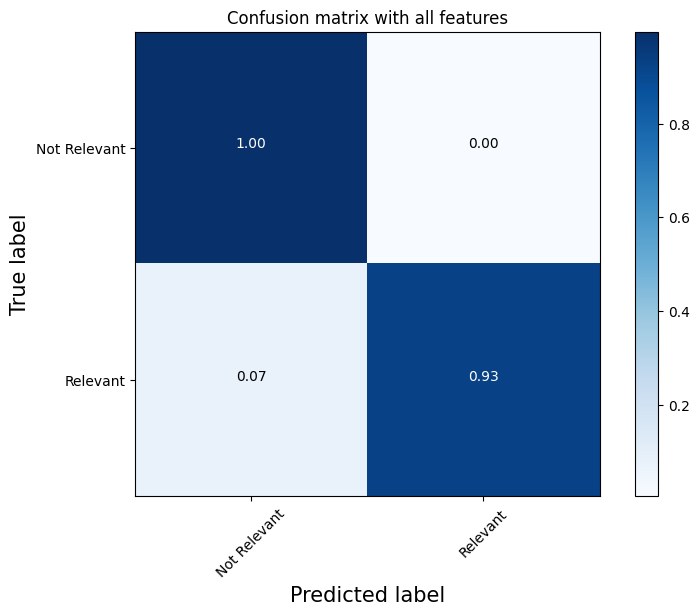

In [39]:
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)


print("Accuracy: ", accuracy_score(y_test, y_pred_class))


cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

Hemos obtenidos unos resultados sorprendentemente buenos.

#### Word Embeddings y clasificadores

In [1]:
!pip install gensim
!pip install scikit-learn
!pip install pandas

In [5]:
import collections
from collections import abc
collections.Mapping = abc.Mapping

import gensim
from gensim.models import Word2Vec
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np



Da muchos problemas la librería gensim al no estar actualizada respecto a sus dependencias. Después de innumerables intentos fallidos, he tenido que aplicar un parche temporal a gensim para evitar este problema importando Mapping desde collections.abc en lugar de collections.

In [7]:
df = pd.read_csv("SPAM text message 20170820 - Data.csv")

In [4]:
!pip install --upgrade gensim


In [8]:
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
import gensim
from gensim.models import Word2Vec
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# División de los datos
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Entrenamiento del modelo Word2Vec
embedding_size = 100
w2v_model = Word2Vec(sentences=X_train, vector_size=embedding_size, window=5, min_count=1, workers=4)

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0.
    for word in words:
        if word in vocabulary:
            n_words += 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Crear matrices de características
train_vectors = np.array([average_word_vectors(words, w2v_model, w2v_model.wv.index_to_key, embedding_size) for words in X_train])
test_vectors = np.array([average_word_vectors(words, w2v_model, w2v_model.wv.index_to_key, embedding_size) for words in X_test])

# Clasificador Naive Bayes
nb_model = GaussianNB()
nb_model.fit(train_vectors, y_train)

# Predicciones
y_pred = nb_model.predict(test_vectors)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9524663677130045
Precision: 0.8116883116883117
Recall: 0.8389261744966443
F1 Score: 0.8250825082508252


In [10]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


#### Clasificador con WE y DL

In [9]:
df["Category_encoded"] = df["Category"].astype('category').cat.codes

In [10]:
df.head(1)

,Category,Message,Category_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


# Crear y ajustar el Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Message'])
X = tokenizer.texts_to_sequences(df['Message'])
X = pad_sequences(X)
y = df['Category_encoded']

# Dividir el corpus en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear los Word Embeddings
embedding_size = 100
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=X.shape[1]))
model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/5
140/140 [==============================] - 60s 374ms/step - loss: 0.2114 - accuracy: 0.9282 - val_loss: 0.0613 - val_accuracy: 0.9830
Epoch 2/5
140/140 [==============================] - 50s 357ms/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.0419 - val_accuracy: 0.9910
Epoch 3/5
140/140 [==============================] - 50s 357ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.0378 - val_accuracy: 0.9901
Epoch 4/5
140/140 [==============================] - 49s 350ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0398 - val_accuracy: 0.9883
Epoch 5/5
35/35 [==============================] - 1s 39ms/step - loss: 0.0382 - accuracy: 0.9910
Loss: 0.03821657970547676, Accuracy: 0.9910314083099365


In [13]:
from sklearn.metrics import roc_curve, auc, f1_score

# Predecir las probabilidades de clase para los datos de prueba
y_pred_prob = model.predict(X_test)

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Calcular el F1-score
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir las probabilidades en clases binarias
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("ROC AUC:", roc_auc)
print("F1-score:", f1)

35/35 [==============================] - 4s 102ms/step
ROC AUC: 0.9919615935081356
F1-score: 0.9657534246575343
